# This notebook explores implementation of Logistic Regression from Scratch

In [2]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# load data
data = pd.read_csv('dataset.csv')

In [4]:
data

,x,y
0,0.000,0
1,0.294,0
2,0.588,0
3,0.882,0
4,1.176,0
5,1.471,0
6,1.765,0
7,2.059,0
8,2.353,0
9,2.647,0


In [14]:
data ['1'] = np.array(1)

Text(0.5, 1.0, 'Scatter Plot of data')

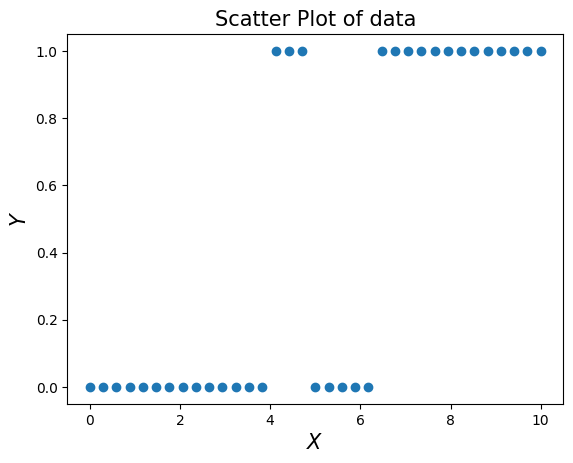

In [15]:
# plot the data to visualize
plt.scatter(data['x'],data['y'])
plt.xlabel('$X$',fontsize=15)
plt.ylabel('$Y$',fontsize=15)
plt.title("Scatter Plot of data", fontsize=15)

Now we need to model a sigmoid function to fit the data.<br>
The formula from mathematical intuition would be:<br>
$Y$ = $\frac{1}{1+e^{(\beta_{0} + \beta X)}}$

But, before that, we need to calculate the $\beta 's$<br>
This can be done by the classical matrix method of linear regression .

In [19]:
X = np.array([data['1'],data['x']])
Y = np.array(data['y'])

In [32]:
X = X.T

In [26]:
Y.shape

(35,)

In [33]:
b = (np.linalg.inv(X.T @ X)) @ (X.T @ Y)

In [51]:
b

array([-0.19524868,  0.13047831])

We now get values of $\beta s$, which can be plugged into the sigmoid function to get the curve.<br>
But before that we visualize the linear regression curve.

Text(0, 0.5, '$Y$')

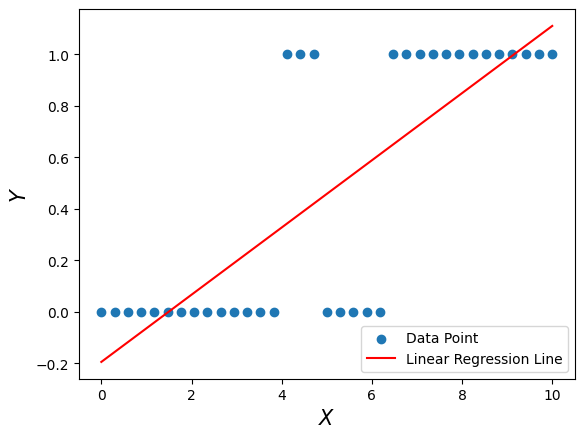

In [81]:
# plot linear regression curve
linreg = b[0]+b[1]*data["x"]
plt.scatter(data['x'],data['y'],label='Data Point')
plt.plot(data['x'],linreg,color='r',label='Linear Regression Line')
plt.legend()
plt.xlabel('$X$',fontsize=15)
plt.ylabel('$Y$',fontsize=15)

We now model the probabilities into sigmoid curve

In [54]:
# since sigmoid function here models probabilities, we name output as p

# define sigmoid function first
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# since x here corresponds to linear regression values

p = sigmoid(linreg)

Text(0, 0.5, '$Y$')

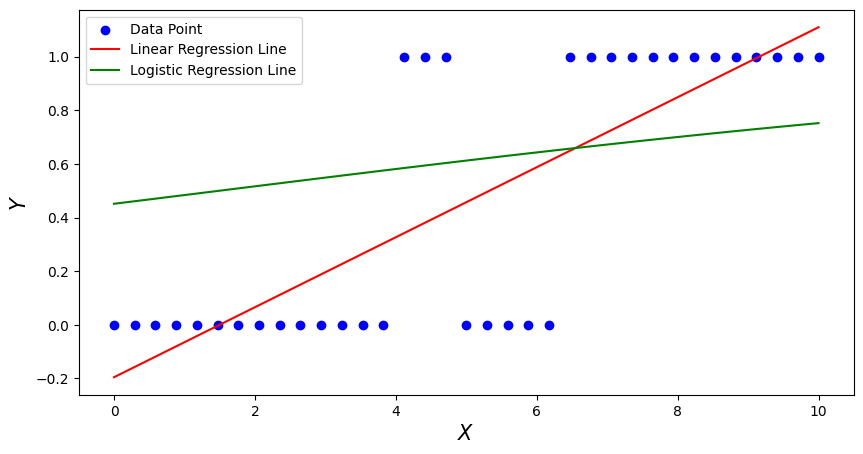

In [82]:
# plot the sigmoid obtained
plt.figure(figsize=(10,5))
plt.scatter(data['x'],data['y'],color='b',label='Data Point')
plt.plot(data['x'],linreg,color='r',label='Linear Regression Line')
plt.plot(data['x'],p,color='g',label='Logistic Regression Line')
plt.legend()
plt.xlabel('$X$',fontsize=15)
plt.ylabel('$Y$',fontsize=15)

We see that we get a fit for probabilities using logistic regression.<br>
Now the prediction will be as follows:<br>
If p > 0.5 - label 1, else label 0

Text(0, 0.5, '$Y$')

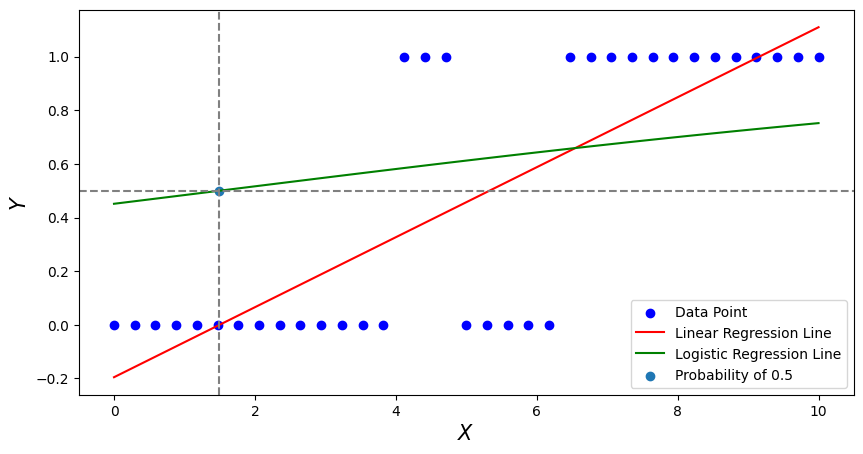

In [83]:
#plot the sigmoid obtained and the point where p = 0.5
plt.figure(figsize=(10,5))
plt.scatter(data['x'],data['y'],color='b',label='Data Point')
plt.plot(data['x'],linreg,color='r',label='Linear Regression Line')
plt.plot(data['x'],p,color='g',label='Logistic Regression Line')
plt.scatter((1/b[1]) * (-b[0]),0.5,label='Probability of 0.5')
plt.legend()
plt.axvline(x=(1/b[1]) * (-b[0]), color='gray',linestyle='--')
plt.axhline(y=0.5, color='gray',linestyle='--')
plt.xlabel('$X$',fontsize=15)
plt.ylabel('$Y$',fontsize=15)

Now we can intuitively understand that all the points to the right of the axv line are classified as label 1 (p>0.5) and label 0 for points lying to the left.<br>

### Conclusion:
Even though the loss/classification error is higher in the logistic regression model built. We still consider this to be a classification model since our main aim was to explore the algorithm, not fine-tuning it.<br>
Predictions from this model can be made more accurate by using various methods like regularization, gradient descent and many more, which we will possibly implement in the other notebooks.